In [1]:
%load_ext jupyter_black
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl


In [2]:
ret_value = pd.read_csv(
    "Data/5_Industry_Portfolios_Daily.csv",
    skiprows=10,
    index_col=0,
    names=["date", "consumer", "manufacture", "hitech", "health", "other"],
    parse_dates=True,
    nrows=25690,
)
ret_value.tail()

,consumer,manufacture,hitech,health,other
date,,,,,
2024-02-23,0.18,0.16,-0.29,0.43,0.31
2024-02-26,0.35,-0.23,-0.41,-0.22,-0.41
2024-02-27,0.19,0.32,0.31,0.29,0.28
2024-02-28,0.20,0.07,-0.55,-0.57,-0.03
2024-02-29,0.56,0.40,1.02,-0.90,0.42


Convert to log-returns


<Axes: xlabel='date'>

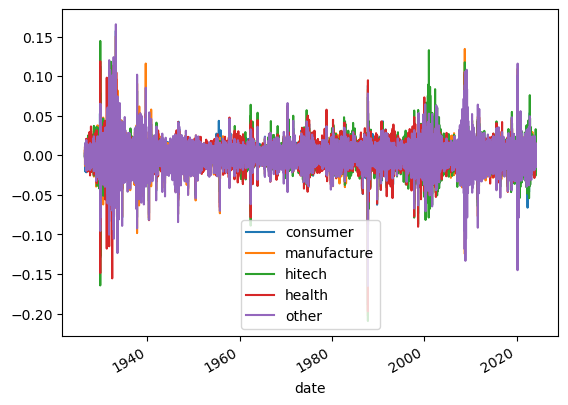

In [3]:
log_returns = np.log(ret_value / 100 + 1)
log_returns.plot()

Model, where y_t is log-returns:

\begin{align}

y_t &= \mu+exp(h_t/2)\epsilon_t, \quad &\epsilon_t \sim \mathcal{N}(0,1) \\
h_{t+1}&= c + \phi (h_t-c)+\sigma_\eta \eta_t, \quad &\eta_t \sim \mathcal{N}(0,1) \\
h_1 &\sim \mathcal{N} (c,\sigma^2_\eta/(1-\phi^2)),
\end{align}
With:
- $y_t$ log-returns
- $h_t$ variance

In [16]:
m = 100  # number of observations
mu = 0.0001
sigma_eta = 1
phi = 0.4
c = 1

# create random generator
# Generate the noise
rng = np.random.default_rng()
epsilon = rng.normal(0, 1, m)
eta = rng.normal(0, 1, m)
h = np.zeros(m)
y = np.zeros(m)
h[0] = rng.normal(c, sigma_eta**2 / (1 - phi**2))
# y[0] = np.exp(h[0] / 2) * epsilon[0]

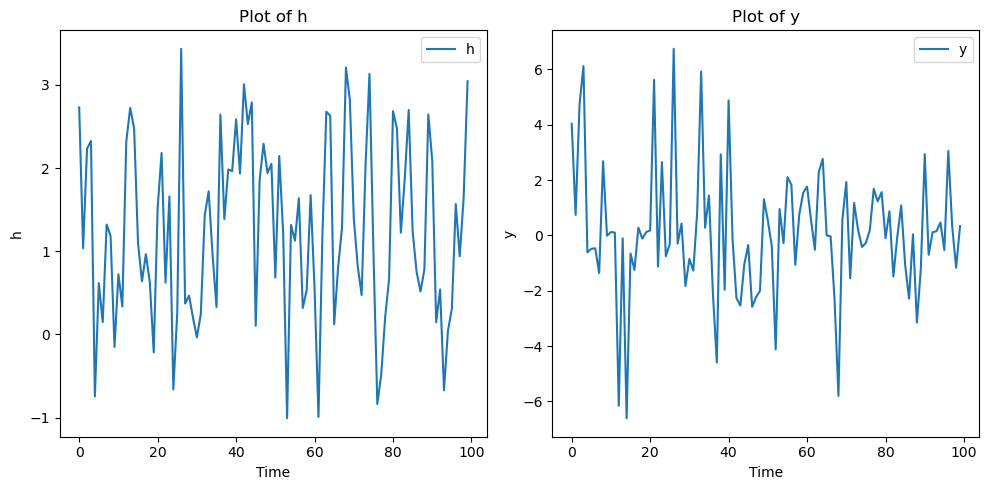

In [17]:
for t in range(0, m):
    h[t] = c + phi * (h[t - 1] - c) + sigma_eta * eta[t]
y = np.exp(h / 2) * epsilon
plt.figure(figsize=(10, 5))

# Plot h
plt.subplot(1, 2, 1)
plt.plot(h, label="h")
plt.xlabel("Time")
plt.ylabel("h")
plt.title("Plot of h")
plt.legend()

# Plot y
plt.subplot(1, 2, 2)
plt.plot(y, label="y")
plt.xlabel("Time")
plt.ylabel("y")
plt.title("Plot of y")
plt.legend()

plt.tight_layout()
plt.show()